Plot vertical temperature profile from NCEP reanalysis data. xarray.open_dataset can open and decode a dataset from a file path or an OpenDAP URL.

The dataset that we will be using is here:
Catalog for long term mean data: https://psl.noaa.gov/thredds/catalog/Datasets/ncep.reanalysis.derived/pressure/catalog.html

Data server catalog for all NOAA data:
https://psl.noaa.gov/thredds/catalog/catalog.html

In [10]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import metpy.calc
from metpy.units import units

In [14]:
file1 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/other_gauss/ulwrf.ntat.mon.ltm.nc'
with xr.open_dataset(file1) as ds1:
#    print(ds1)
    olr=ds1.ulwrf # Unit is W/m2
    print(olr)

<xarray.DataArray 'ulwrf' (time: 12, lat: 94, lon: 192)>
[216576 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Attributes:
    long_name:     Long Term Mean Monthly Mean of Upward Longwave Radiation Flux
    valid_range:   [-400.  700.]
    units:         W/m^2
    precision:     1
    var_desc:      Upward Longwave Radiation Flux
    level_desc:    Nominal Top of atmosphere
    statistic:     Long Term Mean
    parent_stat:   Mean
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [ 95.24881 346.90558]
    _ChunkSizes:   [  1  94 192]


/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


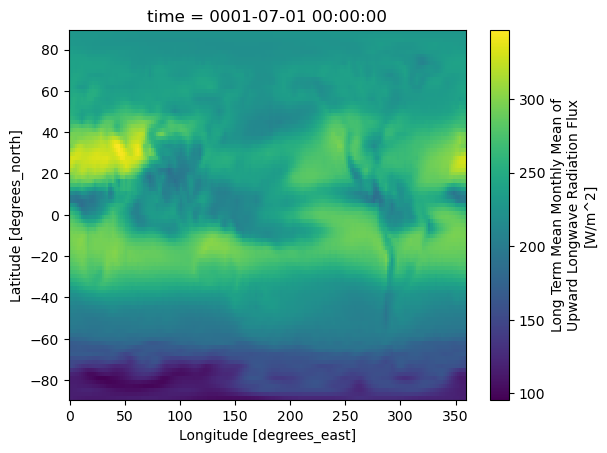

In [16]:
# Make a plot for July near surface specific humidity
olr.isel(time=6).plot()

In [ ]:
# Make a prettier plot
lev1=np.arange(140,360,20)
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.RdYlBu_r

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=(olr.isel(time=6)).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('Outgoing Longwave Radiation (W/m2)')
fig1.colorbar(cs, orientation='horizontal') # color map

### Problem 1
Explain OLR distribution in July

In [61]:
# Open surface temperature file
file2 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/surface_gauss/air.2m.mon.ltm.nc'
with xr.open_dataset(file2) as ds2:
 #   print(ds2)
    ts=ds2.air  # Unit K
    print(ts)

<xarray.DataArray 'air' (time: 12, lat: 94, lon: 192)>
[216576 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Attributes: (12/13)
    long_name:     Long Term Mean Monthly Mean of Air Temperature
    valid_range:   [150. 400.]
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    ...            ...
    level_desc:    2 m
    statistic:     Long Term Mean
    parent_stat:   Mean
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [199.70786 312.07498]
    _ChunkSizes:   [  1  94 192]


/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [ ]:
# Make a map for July temperature near surface
lev1=np.arange(260,310,2)
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.RdYlBu_r

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=(ts.isel(time=6)).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('July Temperature (K)')
fig1.colorbar(cs, orientation='horizontal') # color map

### Problem 2
Explain temperature distribution in July.

In [ ]:
#Outgoing longwave radiation at surface
sigma=5.67e-8
lw_sfc=sigma*ts**4
lw_sfc.isel(time=6).plot()

In [ ]:
# Make a prettier plot
lev1=np.arange(140,360,20)
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.RdYlBu_r

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=(lw_sfc.isel(time=6)).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('LW_sfc (W/m2)')
fig1.colorbar(cs, orientation='horizontal') # color map

### Greenhouse effect
Let's Compare the longwave radiation at the top of the atmosphere (OLR) and at the surface.

In [ ]:
ghe=lr_sfc-olr
ghe.isel(time=6).plot()

In [ ]:
# Make a prettier plot
lev1=np.arange(0,240,30)
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.RdYlBu_r

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=(ghe.isel(time=6)).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('Greenhouse effect in July (W/m2)')
fig1.colorbar(cs, orientation='horizontal') # color map

### Problem 3
Compare and explain the difference between the longwave radiation at the top of the atmosphere (OLR) and at the surface.

### Greenhouse effect in January
Let's make a plot for the greenhouse effect in January.

In [ ]:
# Make a prettier plot
lev1=np.arange(0,240,30)
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.RdYlBu_r

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=(ghe.isel(time=0)).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('Greenhouse effect in January (W/m2)')
fig1.colorbar(cs, orientation='horizontal') # color map

### Problem 4
Explain the differences in and causes of the greenhouse effect in January and July. 

### Problem 5
Calculate and plot the annual average olr. Explain the distribution.

### Problem 6
Explain the distribution of annual average olr.